In [10]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")
    
from src.utils import *
from src.plots import *

# Video model

In [4]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embs = torch.load('../embeddings/video/raw.pt')

In [5]:
train_loader, test_loader = train_test_dataloader(embs)

In [6]:
model = MLP(input_dim = 512, hidden_dims = [256], output_dim = 6).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
num_epochs = 50

PARAMS = {'model': model,
          'criterion': criterion,
          'optimizer': optimizer,
          'num_epochs': num_epochs,
          'train_loader': train_loader,
          'test_loader': test_loader,
          'device': DEVICE,
          'patience': 10}

/home/mweuro/venvy/best_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
results  = train_model(**PARAMS)

Epoch 5/50
Train Loss: 1.3766,                    Train Accuracy: 0.4276,                    Train Precision: 0.4138,                    Train Recall 0.4276.
Val Loss: 1.3173,                    Val Accuracy: 0.4668,                    Val Precision: 0.4792,                    Val Recall: 0.4668.
--------------------------------------------------


Epoch 10/50
Train Loss: 1.2269,                    Train Accuracy: 0.4966,                    Train Precision: 0.4874,                    Train Recall 0.4966.
Val Loss: 1.2016,                    Val Accuracy: 0.5084,                    Val Precision: 0.5355,                    Val Recall: 0.5084.
--------------------------------------------------


Epoch 15/50
Train Loss: 1.1431,                    Train Accuracy: 0.5368,                    Train Precision: 0.5289,                    Train Recall 0.5368.
Val Loss: 1.0929,                    Val Accuracy: 0.5722,                    Val Precision: 0.5951,                    Val Recall: 0.5722.
--------------------------------------------------


Epoch 20/50
Train Loss: 1.0942,                    Train Accuracy: 0.5581,                    Train Precision: 0.5532,                    Train Recall 0.5581.
Val Loss: 1.0414,                    Val Accuracy: 0.5964,                    Val Precision: 0.6174,                    Val Recall: 0.5964.
--------------------------------------------------


Epoch 25/50
Train Loss: 1.0691,                    Train Accuracy: 0.5702,                    Train Precision: 0.5644,                    Train Recall 0.5702.
Val Loss: 1.0067,                    Val Accuracy: 0.6132,                    Val Precision: 0.6281,                    Val Recall: 0.6132.
--------------------------------------------------


Epoch 30/50
Train Loss: 1.0387,                    Train Accuracy: 0.5721,                    Train Precision: 0.5660,                    Train Recall 0.5721.
Val Loss: 1.0533,                    Val Accuracy: 0.6004,                    Val Precision: 0.6413,                    Val Recall: 0.6004.
--------------------------------------------------


Epoch 35/50
Train Loss: 1.0108,                    Train Accuracy: 0.5894,                    Train Precision: 0.5865,                    Train Recall 0.5894.
Val Loss: 0.9586,                    Val Accuracy: 0.6293,                    Val Precision: 0.6383,                    Val Recall: 0.6293.
--------------------------------------------------


Epoch 40/50
Train Loss: 0.9863,                    Train Accuracy: 0.6003,                    Train Precision: 0.5969,                    Train Recall 0.6003.
Val Loss: 1.0077,                    Val Accuracy: 0.5944,                    Val Precision: 0.6141,                    Val Recall: 0.5944.
--------------------------------------------------


Epoch 45/50
Train Loss: 0.9779,                    Train Accuracy: 0.6023,                    Train Precision: 0.6005,                    Train Recall 0.6023.
Val Loss: 0.9978,                    Val Accuracy: 0.6145,                    Val Precision: 0.6249,                    Val Recall: 0.6145.
--------------------------------------------------


Epoch 50/50
Train Loss: 0.9580,                    Train Accuracy: 0.6013,                    Train Precision: 0.6002,                    Train Recall 0.6013.
Val Loss: 0.8948,                    Val Accuracy: 0.6602,                    Val Precision: 0.6554,                    Val Recall: 0.6602.
--------------------------------------------------
BEST EPOCH: 49.00          BEST ACCURACY: 0.66          BEST PRECISION: 0.66          BEST RECALL: 0.66


In [8]:
epochs, train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs, best_epoch, cm = results

In [13]:
print(f'BEST LOSS: {val_losses[best_epoch]}')

BEST LOSS: 0.8947506892808619


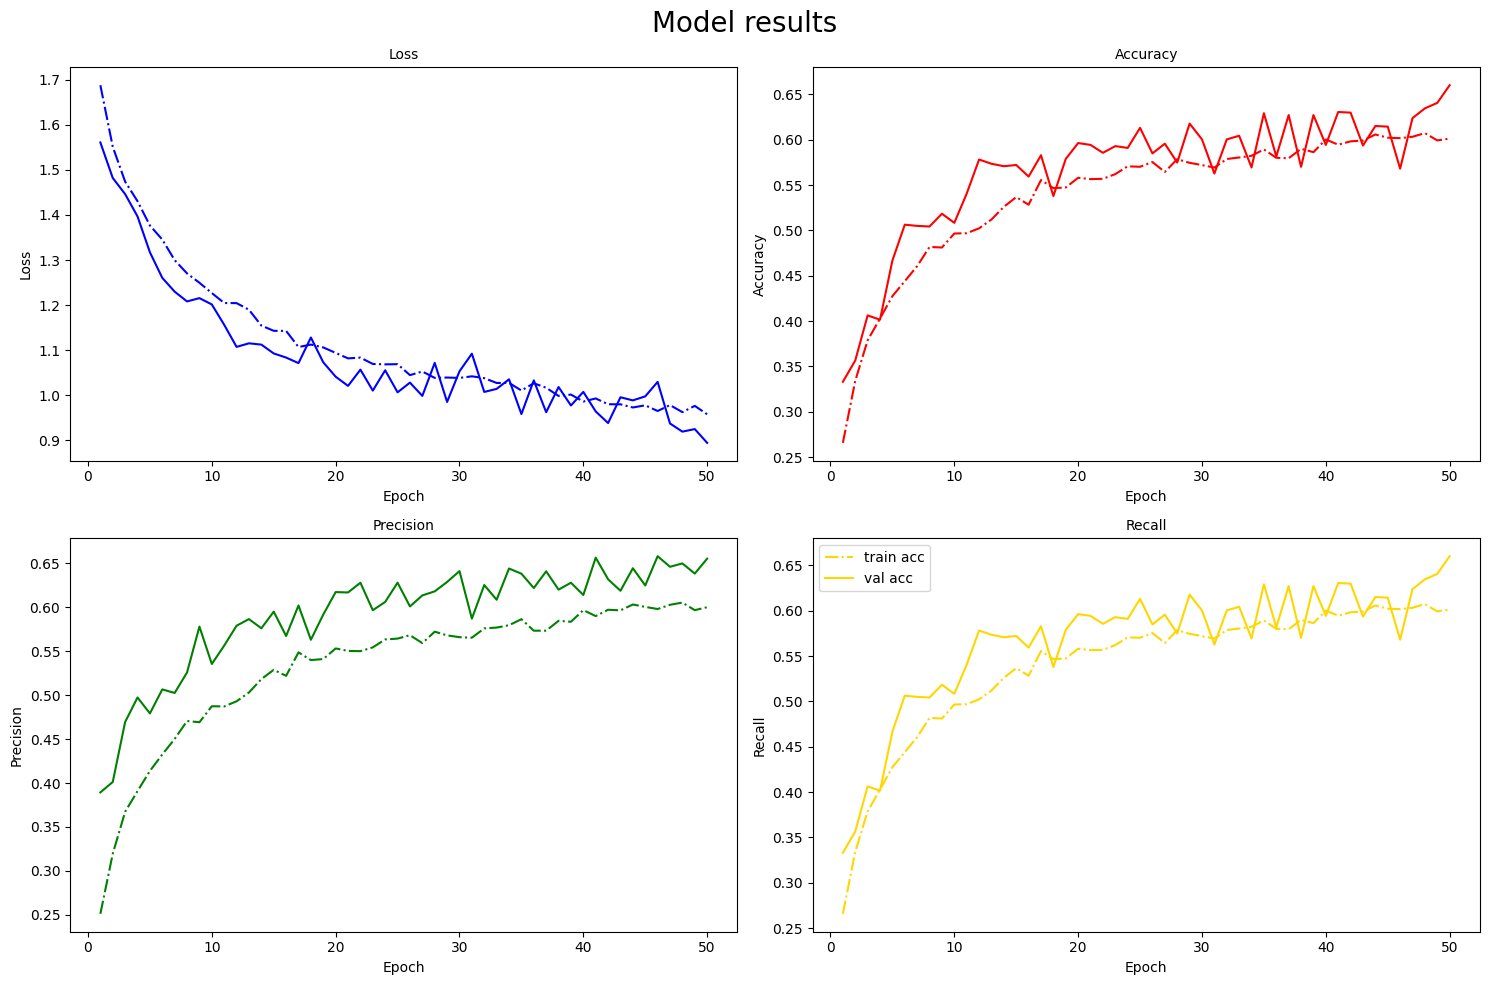

In [11]:
plot_metrics(train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs)

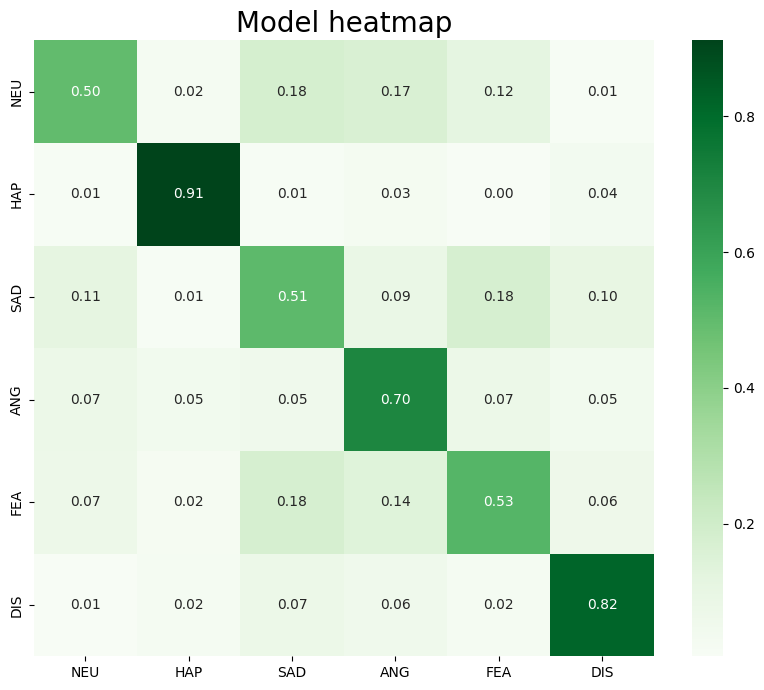

In [12]:
plot_confusion_matrix(cm)